In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

email_data = pd.read_csv('Spam.txt', sep=',', header=None)

print(email_data.head())



     0     1     2    3     4     5     6     7     8     9   ...    48  \
0  0.00  0.64  0.64  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.00   
1  0.21  0.28  0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94  ...  0.00   
2  0.06  0.00  0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25  ...  0.01   
3  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   
4  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   

      49   50     51     52     53     54   55    56  57  
0  0.000  0.0  0.778  0.000  0.000  3.756   61   278   1  
1  0.132  0.0  0.372  0.180  0.048  5.114  101  1028   1  
2  0.143  0.0  0.276  0.184  0.010  9.821  485  2259   1  
3  0.137  0.0  0.137  0.000  0.000  3.537   40   191   1  
4  0.135  0.0  0.135  0.000  0.000  3.537   40   191   1  

[5 rows x 58 columns]


#As of now, the columns are named as integers. Let's manually name the columns appropriately (column names are available at the UCI website here: https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names)

In [2]:
# renaming the columns
email_data.columns  = ["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", 
                      "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet", 
                      "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will", 
                      "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free", 
                      "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit", 
                      "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp", 
                      "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs", 
                      "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85", 
                      "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct",
                      "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re", 
                      "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(", 
                      "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_hash", "capital_run_length_average", 
                      "capital_run_length_longest", "capital_run_length_total", "spam"]
print(email_data.head())

   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0.00            0.00  ...         0.00        0.000   
1 

In [3]:
email_data.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [4]:
email_data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [5]:
email_data['spam'].value_counts()

0    2788
1    1813
Name: spam, dtype: int64

In [6]:
# we can see it is balanced data set

In [7]:
# scale the data

In [8]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

In [9]:
X = email_data.drop('spam', axis=1)

In [10]:
y = email_data['spam'].values.astype(int)

In [11]:
X = scale(X)

c:\users\neeraj bafila\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=4)

In [13]:
# confirm that splitting also has similar distribution of spam and ham 
# emails
print(y_train.mean())
print(y_test.mean())

0.3978260869565217
0.38522809558291093


# Model Building

In [14]:
from sklearn.svm import SVC

In [15]:
svm_1 = SVC(C=1.0, kernel='rbf')

In [16]:
svm_1.fit(X_train, y_train)

c:\users\neeraj bafila\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [17]:
y_pred = svm_1.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

In [19]:
print('Accuray score of model svm_1 is {0}'. format(accuracy_score(y_test, y_pred)))

Accuray score of model svm_1 is 0.9283128167994207


In [20]:
print(confusion_matrix(y_test, y_pred))

[[811  38]
 [ 61 471]]


In [21]:
print('Recall of model svm_1 is {0}'.format(recall_score(y_test, y_pred)))

Recall of model svm_1 is 0.8853383458646616


In [22]:
print('Precision of model svm_1 is {0}'.format(precision_score(y_test, y_pred)))

Precision of model svm_1 is 0.925343811394892


# Hyperparameter Tuning 

Now, we have multiple hyperparameters to optimise - 
- The choice of kernel (linear, rbf etc.)
- C
- gamma

We'll use the ```GridSearchCV()``` method to tune the hyperparameters. 

In [23]:
from sklearn.model_selection import KFold, cross_val_score

In [24]:
fold = KFold(n_splits=5, shuffle=True, random_state=4)

In [25]:
# cr_score = cross_val_score(svm_1,X_train, y_train, cv=fold, n_jobs=-1, verbose=1)
# cr_score

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
# hyper_param = {'C':[1,5,10,100,1000], 'kernel':['linear','rbf'], 'gamma':[0.01, 0.001, 0.0001]}

In [29]:
svm = SVC(kernel='rbf')

In [30]:
hyper_param = {'C':[1,5,10,100,1000], 'gamma':[0.01, 0.001, 0.0001]}

In [31]:
grs = GridSearchCV(svm, param_grid=hyper_param, cv=fold, return_train_score=True, n_jobs=-1, scoring='accuracy', verbose=10)

In [32]:
grs.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   19.4s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [1, 5, 10, 100, 1000], 'gamma': [0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=10)

In [33]:
#svm.get_params().keys()

In [36]:
grs_result =pd.DataFrame(grs.cv_results_)

In [37]:
grs_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.443594,0.028756,0.065627,0.006250,1,0.01,"{'C': 1, 'gamma': 0.01}",0.917702,0.939441,0.922360,...,0.929814,0.008528,6,0.943323,0.940994,0.945264,0.937112,0.939829,0.941304,0.002814
1,0.571550,0.015621,0.106251,0.006249,1,0.001,"{'C': 1, 'gamma': 0.001}",0.886646,0.919255,0.899068,...,0.904037,0.013080,12,0.910326,0.903339,0.908773,0.906056,0.904115,0.906522,0.002672
2,0.958827,0.019315,0.181339,0.012437,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.770186,0.802795,0.791925,...,0.786025,0.015322,15,0.789208,0.779503,0.785326,0.791925,0.788820,0.786957,0.004277
3,0.407129,0.043564,0.056371,0.007755,5,0.01,"{'C': 5, 'gamma': 0.01}",0.913043,0.945652,0.927019,...,0.933230,0.012068,3,0.960016,0.956134,0.958463,0.958463,0.952252,0.957065,0.002707
4,0.446738,0.043287,0.075001,0.006249,5,0.001,"{'C': 5, 'gamma': 0.001}",0.913043,0.933230,0.919255,...,0.925155,0.007758,10,0.932065,0.927795,0.928571,0.927019,0.928571,0.928804,0.001729
5,0.653780,0.019402,0.119843,0.006550,5,0.0001,"{'C': 5, 'gamma': 0.0001}",0.861801,0.897516,0.875776,...,0.880124,0.015509,14,0.888975,0.883929,0.880435,0.886646,0.885093,0.885016,0.002846
6,0.350003,0.021197,0.056250,0.007654,10,0.01,"{'C': 10, 'gamma': 0.01}",0.909938,0.944099,0.934783,...,0.933230,0.012266,3,0.966227,0.966615,0.967003,0.961568,0.962345,0.964752,0.002308
7,0.422969,0.010479,0.071876,0.007656,10,0.001,"{'C': 10, 'gamma': 0.001}",0.917702,0.934783,0.916149,...,0.928261,0.009491,8,0.937112,0.932453,0.936335,0.935171,0.931289,0.934472,0.002242
8,0.576505,0.017309,0.104627,0.006283,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.883540,0.914596,0.899068,...,0.902174,0.013749,13,0.909938,0.902174,0.908773,0.905280,0.902562,0.905745,0.003158
9,0.432756,0.032721,0.046876,0.000002,100,0.01,"{'C': 100, 'gamma': 0.01}",0.913043,0.937888,0.934783,...,0.931677,0.010159,5,0.982531,0.979814,0.982531,0.982143,0.982531,0.981910,0.001059


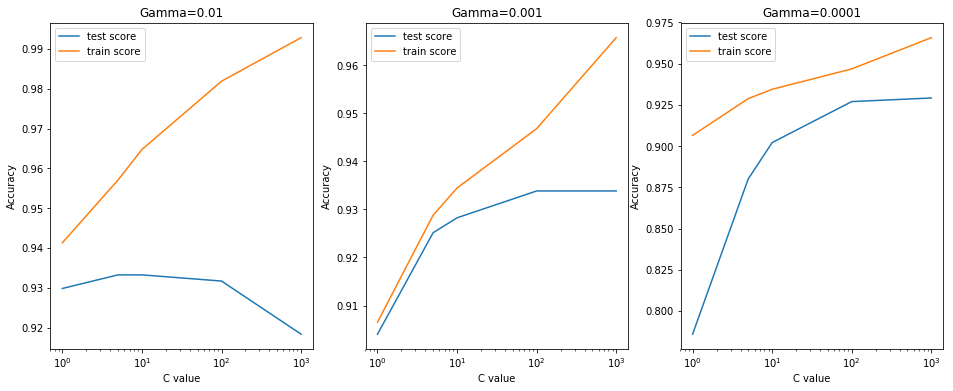

In [82]:
plt.figure(figsize=(16,6))
# converting C to numeric type for plotting on x-axis
grs_result['param_C'] = grs_result['param_C'].astype('int')

plt.subplot(131)
gamma_01 = grs_result[grs_result['param_gamma']==0.01]
plt.plot((gamma_01['param_C']), gamma_01['mean_test_score'])
plt.plot(gamma_01['param_C'], gamma_01['mean_train_score'])
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.legend(['test score', 'train score'], loc='best')
plt.title('Gamma=0.01')
plt.xscale('log')

plt.subplot(132)
gamma_02 = grs_result[grs_result['param_gamma']==0.001]
plt.plot((gamma_02['param_C']), gamma_02['mean_test_score'])
plt.plot(gamma_02['param_C'], gamma_02['mean_train_score'])
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.legend(['test score', 'train score'], loc='best')
plt.title('Gamma=0.001')
plt.xscale('log')

plt.subplot(133)
gamma_03 = grs_result[grs_result['param_gamma']==0.0001]
plt.plot((gamma_03['param_C']), gamma_03['mean_test_score'])
plt.plot(gamma_03['param_C'], gamma_02['mean_train_score'])
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.legend(['test score', 'train score'], loc='best')
plt.title('Gamma=0.0001')
plt.xscale('log')


In [83]:
grs.best_params_

{'C': 100, 'gamma': 0.001}

This plot reveals some interesting insights:
- **High values of gamma** lead to **overfitting** (especially at high values of C); note that the training accuracy at gamma=0.01 and C=1000 reaches almost 99% 
- The **training score increases with higher gamma**, though the **test scores are comparable** (at sufficiently high cost, i.e. C > 10)
- The least amount of overfitting (i.e. difference between train and test accuracy) occurs at low gamma, i.e. a quite *simple non-linear model*


In [85]:
# printing the optimal accuracy score and hyperparameters
best_score = grs.best_score_
best_hyperparams = grs.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9338509316770186 corresponding to hyperparameters {'C': 100, 'gamma': 0.001}


 Though sklearn suggests the optimal scores mentioned above (gamma=0.001, C=100), one could argue that it is better to choose a simpler, more non-linear model with gamma=0.0001. This is because the optimal values mentioned here are calculated based on the average test accuracy (but not considering subjective parameters such as model complexity).

We can achieve comparable average test accuracy (~92.5%) with gamma=0.0001 as well, though we'll have to increase the cost C for that. So to achieve high accuracy, there's a tradeoff between:
- High gamma (i.e. high non-linearity) and average value of C
- Low gamma (i.e. less non-linearity) and high value of C

We argue that the model will be simpler if it has as less non-linearity as possible, so we choose gamma=0.0001 and a high C=100.

# Building and Evaluating the Final Model

Let's now build and evaluate the final model, i.e. the model with highest test accuracy.

In [89]:
best_params = {"C": 100, "gamma": 0.0001, "kernel":"rbf"}

# model
model = SVC(C=100, gamma=0.0001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print(confusion_matrix(y_test, y_pred), "\n")
print("accuracy", accuracy_score(y_test, y_pred))
print("precision", precision_score(y_test, y_pred))
print("sensitivity/recall", recall_score(y_test, y_pred))

[[810  39]
 [ 60 472]] 

accuracy 0.9283128167994207
precision 0.923679060665362
sensitivity/recall 0.8872180451127819


# Conclusion

The accuracy achieved using a non-linear kernel is comparable to that of a linear one. Thus, it turns out that for this problem, **you do not really need a non-linear kernel**.